# 課題

## ピタゴラス音律がルネッサンス以降に平均律に取って代わられた理由を考える

* [Pythagorean tuning - Wikipedia](https://en.wikipedia.org/wiki/Pythagorean_tuning)
    * [How Pythagoras Broke Music (and how we kind of fixed it) [see comments for corrections] - YouTube](https://www.youtube.com/watch?v=EdYzqLgMmgk)
        - [Pythagorean comma - Wikipedia](https://en.wikipedia.org/wiki/Pythagorean_comma)
         - [Wolf interval - Wikipedia](https://en.wikipedia.org/wiki/Wolf_interval)
* [Equal temperament - Wikipedia](https://en.wikipedia.org/wiki/Equal_temperament)

## FMPの "Pythagorean Tuning" を参照する

* [C1E10: Pythagorean Tuning](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1E10_PythagoreanTuning.html)

In [1]:
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import libfmp.c1
import librosa

In [2]:
import pandas as pd
from collections import OrderedDict

# Computation of frequencies and differences
pyt_frac = ['1:1', '$2^8:3^5$', '$3^2:2^3$', '$2^5:3^3$', '$3^4:2^6$', '$2^2:3$', '$3^6:2^9$', 
                   '$3:2$', '$2^7:3^4$', '$3^3:2^4$', '$2^4:3^2$', '$3^5:2^7$', '$2:1$']
pyt_ratio = np.asarray([1, 256/243, 9/8, 32/27, 81/64, 4/3, 729/512, 3/2, 128/81, 27/16, 16/9, 243/128, 2])
p = 60
freq = libfmp.c1.f_pitch(p)
freq_pyt = pyt_ratio * freq
notes = np.asarray(range(p, p + 13))
freq_center = libfmp.c1.f_pitch(notes)
freq_deviation_cents = libfmp.c1.difference_cents(freq_pyt, freq_center)

# Generation of sinusoids
dur = 4    # seconds
Fs = 4000  # sampling rate

sinusoid_freq_center = []
for freq in freq_center:
    x, t = libfmp.c1.generate_sinusoid(dur=dur, Fs=Fs, freq=freq)
    sinusoid_freq_center.append(x)

sinusoid_freq_pyt = []
for freq in freq_pyt:
    x, t = libfmp.c1.generate_sinusoid(dur=dur, Fs=Fs, freq=freq)
    sinusoid_freq_pyt.append(x)

In [3]:
# Generation of sinusoids
dur = 4 #seconds
Fs = 4000 #sampling rate

In [4]:
sinusoid_freq_center = []
for freq in freq_center:
    x, t = libfmp.c1.generate_sinusoid(dur=dur, Fs=Fs, freq=freq)
    sinusoid_freq_center.append(x)

sinusoid_freq_pyt = []
for freq in freq_pyt:
    x, t = libfmp.c1.generate_sinusoid(dur=dur, Fs=Fs, freq=freq)
    sinusoid_freq_pyt.append(x)

# Generation of html table
audio_tag_html_center = []
for i in range(len(freq_center)):
    audio_tag = ipd.Audio(sinusoid_freq_center[i], rate=Fs)
    audio_tag_html = audio_tag._repr_html_().replace('\n', '').strip()
    audio_tag_html = audio_tag_html.replace('<audio ', '<audio style="width: 100px; "')
    audio_tag_html_center.append(audio_tag_html)

audio_tag_html_pyt = []
for i in range(len(freq_pyt)):
    audio_tag = ipd.Audio(sinusoid_freq_pyt[i], rate=Fs)
    audio_tag_html = audio_tag._repr_html_().replace('\n', '').strip()
    audio_tag_html = audio_tag_html.replace('<audio ', '<audio style="width: 100px; "')
    audio_tag_html_pyt.append(audio_tag_html)

pd.set_option('display.max_colwidth', None)
df = pd.DataFrame(OrderedDict([('Note', ['C4', 'C$^\sharp$4', 'D4', 'D$^\sharp$4', 'E4', 'F4',
                                         'F$^\sharp$4', 'G4', 'G$^\sharp$4', 'A4', 'A$^\sharp$4',
                                         'B4', 'C4']),
                               ('ET Freq. (Hz)', freq_center),
                               ('ET Sinusoid', audio_tag_html_center),
                               ('Pyt. Ratio ', pyt_frac),
                               ('Pyt. Freq. (Hz)', freq_pyt),
                               ('Pyt. Sinusoid', audio_tag_html_pyt),
                               ('Difference (Cents)', freq_deviation_cents)]))

df.index = np.arange(1, len(df) + 1)
ipd.HTML(df.to_html(escape=False, float_format='%.2f'))

スペクトログラム表示用の関数を定義する:

In [5]:
def plot_spectrogram(x, Fs=11025, N=4096, H=2048, figsize=(4, 2)):
    """Computation and subsequent plotting of the spectrogram of a signal

    Notebook: C1/C1S3_Timbre.ipynb

    Args:
        x: Signal (waveform) to be analyzed
        Fs: Sampling rate (Default value = 11025)
        N: FFT length (Default value = 4096)
        H: Hopsize (Default value = 2048)
        figsize: Size of the figure (Default value = (4, 2))

    """
    X = librosa.stft(x, n_fft=N, hop_length=H, win_length=N, window=np.hanning)
    Y = np.abs(X)
    plt.figure(figsize=figsize)
    librosa.display.specshow(librosa.amplitude_to_db(Y, ref=np.max),
                             y_axis='linear', x_axis='time', sr=Fs, hop_length=H, cmap='gray_r')
    plt.ylim([0, 1000])
    # plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Frequency (Hz)')
    plt.tight_layout()
    plt.show()

定義された定数の確認

In [6]:
pyt_ratio

array([1.        , 1.05349794, 1.125     , 1.18518519, 1.265625  ,
       1.33333333, 1.42382812, 1.5       , 1.58024691, 1.6875    ,
       1.77777778, 1.8984375 , 2.        ])

In [7]:
freq_pyt

array([261.6255653 , 275.62199472, 294.32876096, 310.07474406,
       331.11985608, 348.83408707, 372.50983809, 392.43834795,
       413.43299208, 441.49314144, 465.11211609, 496.67978413,
       523.2511306 ])

In [8]:
freq_center

array([261.6255653 , 277.18263098, 293.66476792, 311.12698372,
       329.62755691, 349.22823143, 369.99442271, 391.99543598,
       415.30469758, 440.        , 466.16376152, 493.88330126,
       523.2511306 ])

In [9]:
# 基底周波数に対して 2^(1/12) 倍を繰り返す
261.6255653*(2**(1/12))**(np.arange(0, 13))

array([261.6255653 , 277.18263098, 293.66476792, 311.12698372,
       329.62755691, 349.22823143, 369.99442271, 391.99543598,
       415.30469758, 440.        , 466.16376152, 493.88330125,
       523.2511306 ])

* [Cent (music) - Wikipedia](https://en.wikipedia.org/wiki/Cent_(music))

In [10]:
# セントは 2^(1/1200) で細分化した単位
261.6255653*(2**(1/1200))**(np.arange(0, 13)*100)

array([261.6255653 , 277.18263098, 293.66476792, 311.12698372,
       329.62755691, 349.22823143, 369.99442271, 391.99543598,
       415.30469758, 440.        , 466.16376152, 493.88330125,
       523.2511306 ])

In [11]:
# 与えられたピタゴラス音律と平均律の比 (単位はセント)
freq_deviation_cents

array([ 0.        , -9.77500433,  3.91000173, -5.8650026 ,  7.82000346,
       -1.95500087, 11.73000519,  1.95500087, -7.82000346,  5.8650026 ,
       -3.91000173,  9.77500433,  0.        ])

In [12]:
# 単純な比
freq_pyt / freq_center

array([1.        , 0.99436965, 1.00226106, 0.99661797, 1.00452723,
       0.99887138, 1.00679852, 1.00112989, 0.99549318, 1.0033935 ,
       0.99774404, 1.00566223, 1.        ])

In [13]:
# セントに変換
1200*np.log2(freq_pyt / freq_center)

array([ 0.        , -9.77500433,  3.91000173, -5.8650026 ,  7.82000346,
       -1.95500087, 11.73000519,  1.95500087, -7.82000346,  5.8650026 ,
       -3.91000173,  9.77500433,  0.        ])

## 完全五度の和音

* [Perfect fifth - Wikipedia](https://en.wikipedia.org/wiki/Perfect_fifth)
    - 0&ndash;7

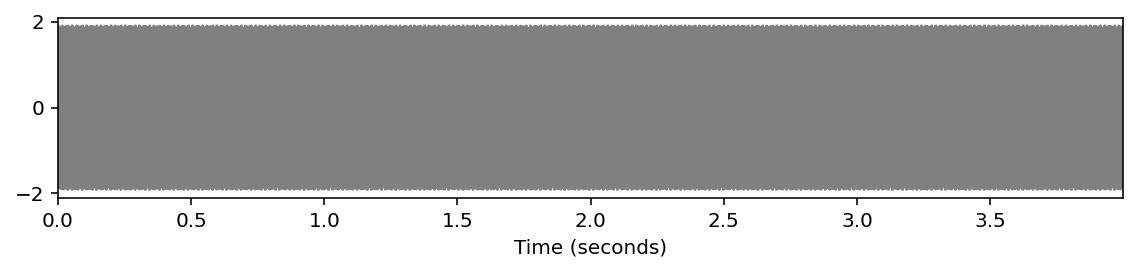

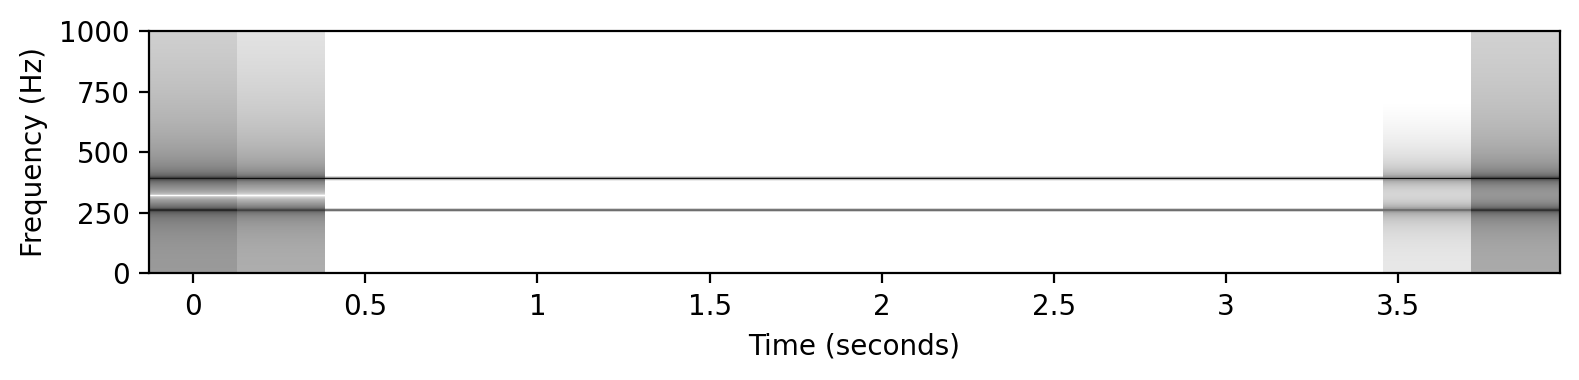

In [14]:
# ピタゴラス音律 (C4+G4)
x0 = sinusoid_freq_pyt[0]+sinusoid_freq_pyt[7]
# x0 += sinusoid_freq_pyt[4]
ipd.display(ipd.Audio(x0, rate=Fs))
libfmp.b.plot_signal(x0, Fs=Fs, figsize=(8, 2))
plt.show()
plot_spectrogram(x0, Fs=Fs, N=4096, H=1024, figsize=(8, 2))

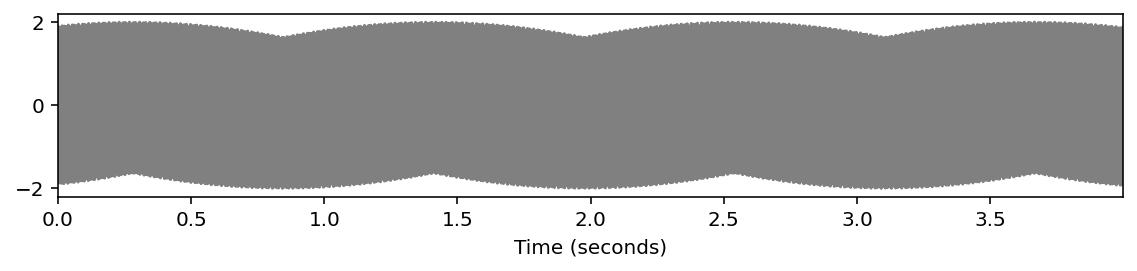

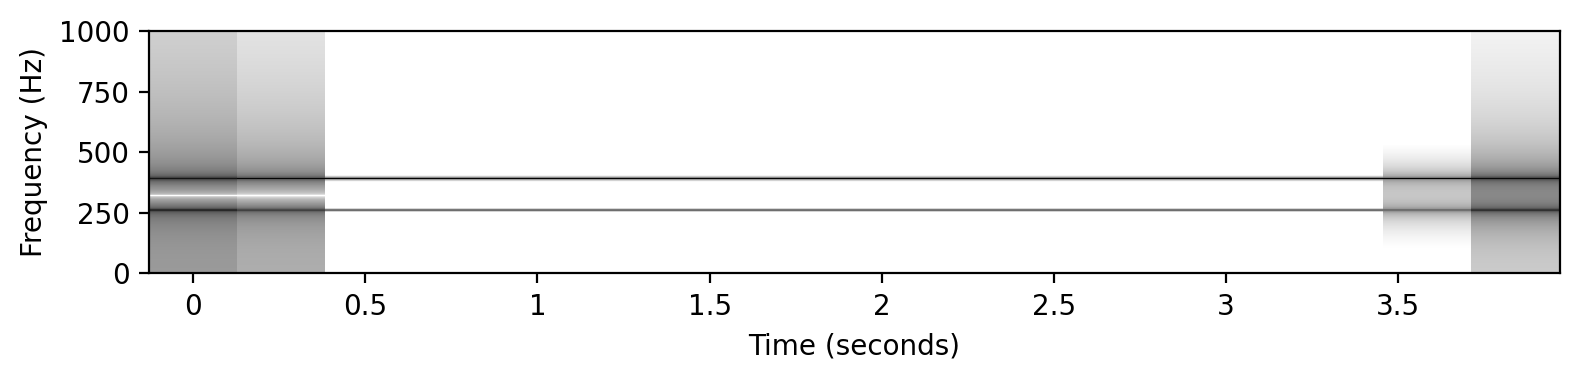

In [15]:
# 平均律 (C4+G4)
x1 = sinusoid_freq_center[0]+sinusoid_freq_center[7]
# x1 += sinusoid_freq_center[4]
ipd.display(ipd.Audio(x1, rate=Fs))
libfmp.b.plot_signal(x1, Fs=Fs, figsize=(8, 2))
plt.show()
plot_spectrogram(x1, Fs=Fs, N=4096, H=1024, figsize=(8, 2))

### 完全五度の根音を設定可能にした

In [16]:
# 0 から 5 まで
root = 4

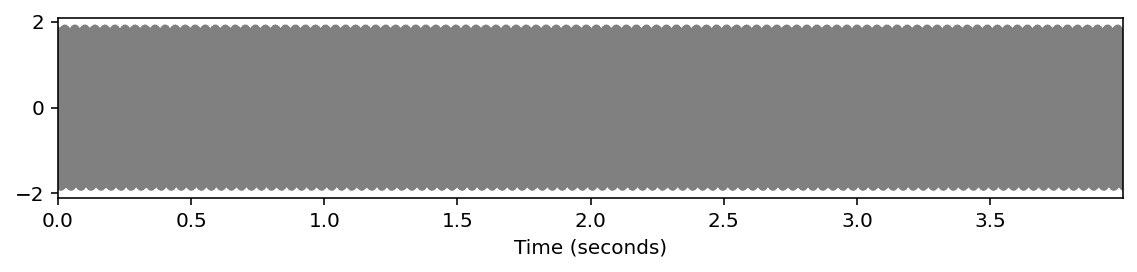

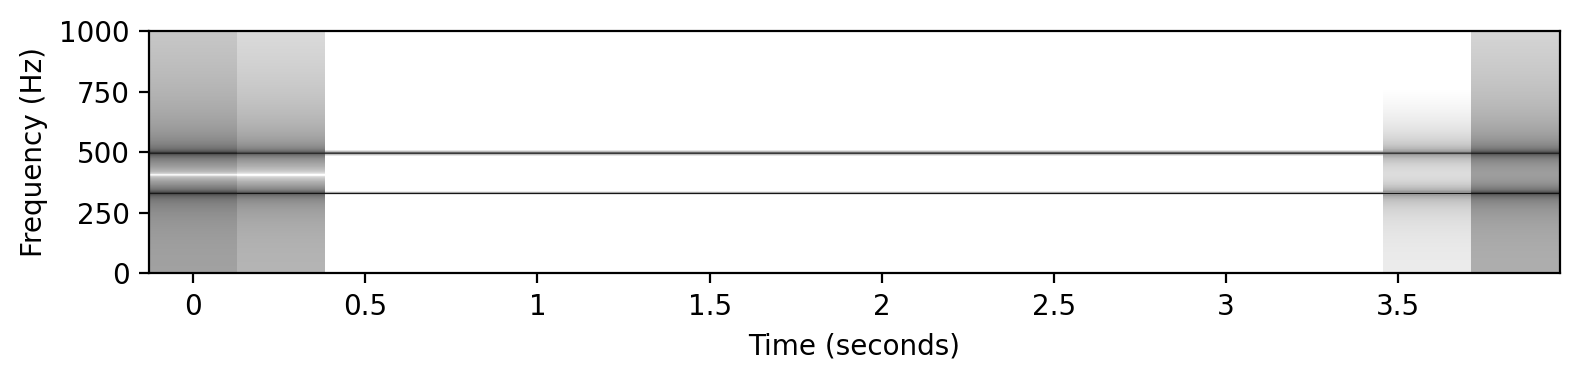

In [17]:
# ピタゴラス音律
x2 = sinusoid_freq_pyt[root]+sinusoid_freq_pyt[(root+7) % 12]*((root+4)//12+1)
# x2 += +sinusoid_freq_pyt[(root+4) % 12]*((root+4)//12+1)
ipd.display(ipd.Audio(x2, rate=Fs))
libfmp.b.plot_signal(x2, Fs=Fs, figsize=(8, 2))
plt.show()
plot_spectrogram(x2, Fs=Fs, N=4096, H=1024, figsize=(8, 2))

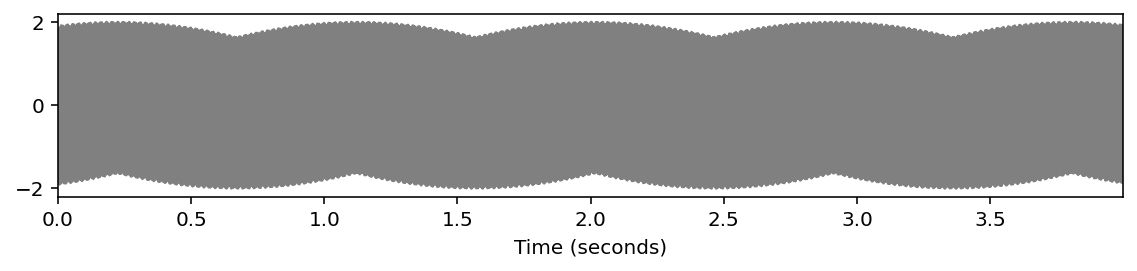

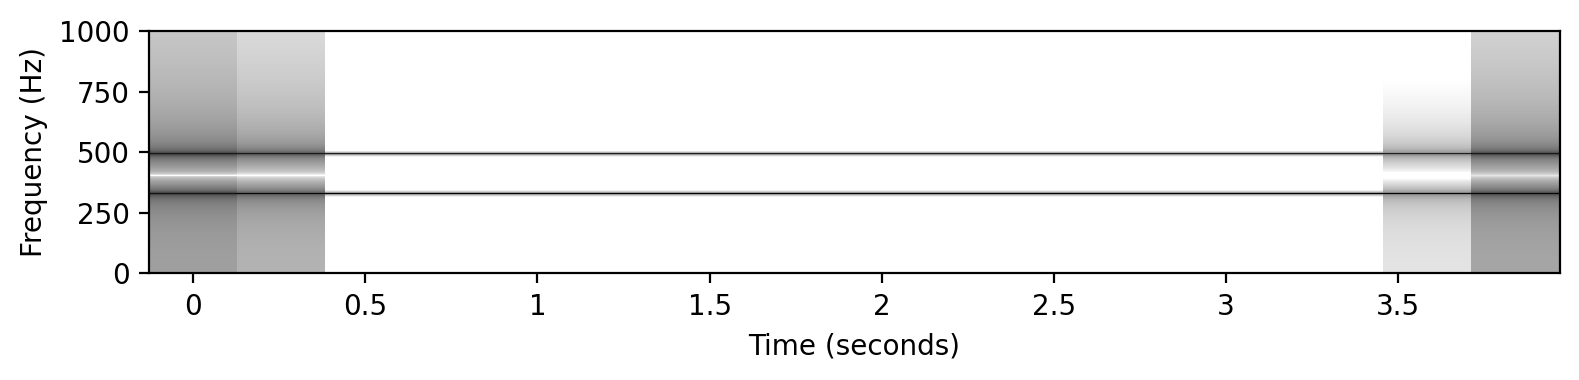

In [18]:
# 平均律
x3 = sinusoid_freq_center[root]+sinusoid_freq_center[(root+7) % 12]*((root+4)//12+1)
# x3 += +sinusoid_freq_center[(root+4) % 12]*((root+4)//12+1)
ipd.display(ipd.Audio(x3, rate=Fs))
libfmp.b.plot_signal(x3, Fs=Fs, figsize=(8, 2))
plt.show()
plot_spectrogram(x3, Fs=Fs, N=4096, H=1024, figsize=(8, 2))

## 三和音

* [Triad (music) - Wikipedia](https://en.wikipedia.org/wiki/Triad_(music))
    - major triads (0&ndash;4&ndash;7)

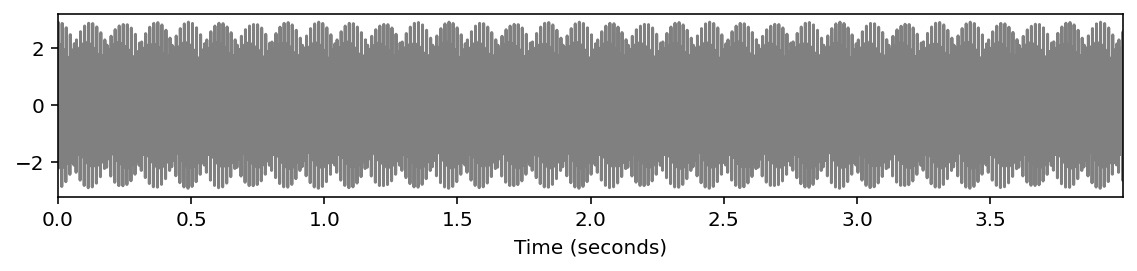

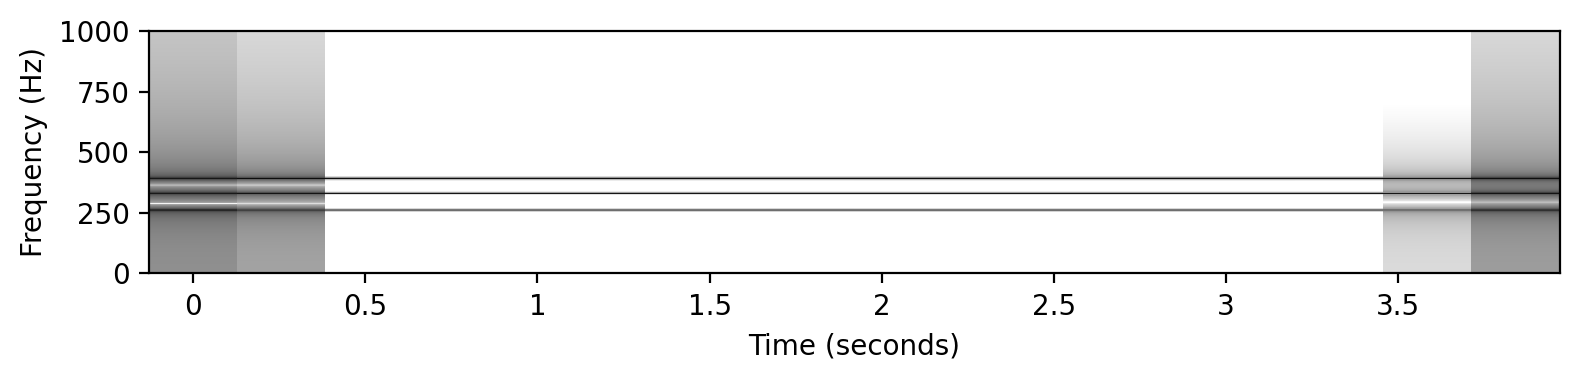

In [19]:
# ピタゴラス音律 (C4+E4+G4)
x0 = sinusoid_freq_pyt[0]+sinusoid_freq_pyt[7]
x0 += sinusoid_freq_pyt[4]
ipd.display(ipd.Audio(x0, rate=Fs))
libfmp.b.plot_signal(x0, Fs=Fs, figsize=(8, 2))
plt.show()
plot_spectrogram(x0, Fs=Fs, N=4096, H=1024, figsize=(8, 2))

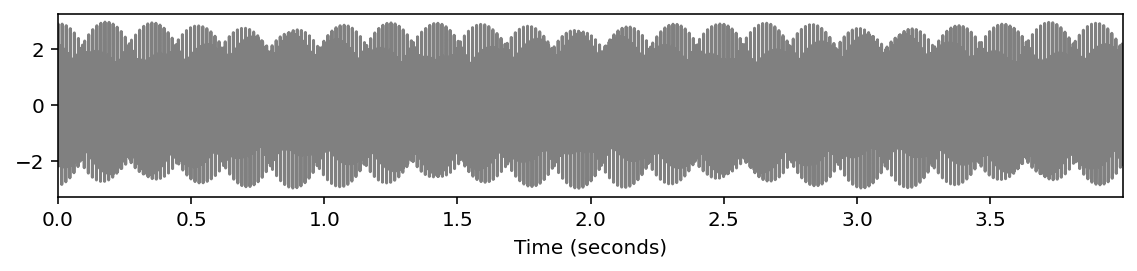

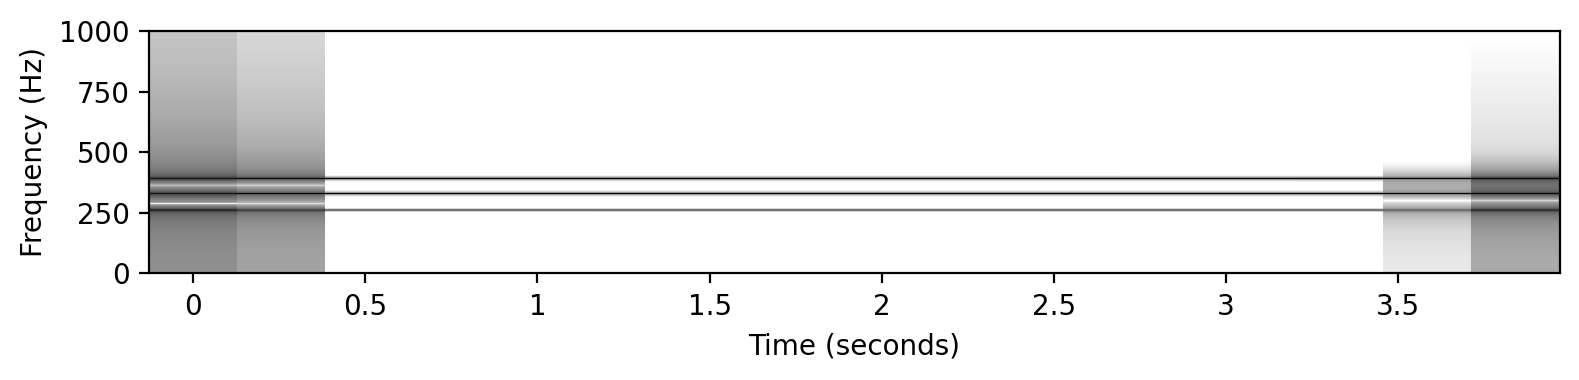

In [20]:
# 平均律 (C4+E4+G4)
x1 = sinusoid_freq_center[0]+sinusoid_freq_center[7]
x1 += sinusoid_freq_center[4]
ipd.display(ipd.Audio(x1, rate=Fs))
libfmp.b.plot_signal(x1, Fs=Fs, figsize=(8, 2))
plt.show()
plot_spectrogram(x1, Fs=Fs, N=4096, H=1024, figsize=(8, 2))

### 根音を選択可能にした

In [21]:
# 0 から 5まで
root = 4

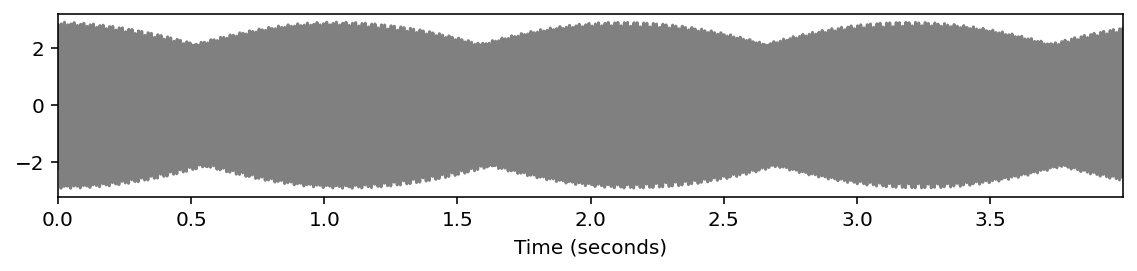

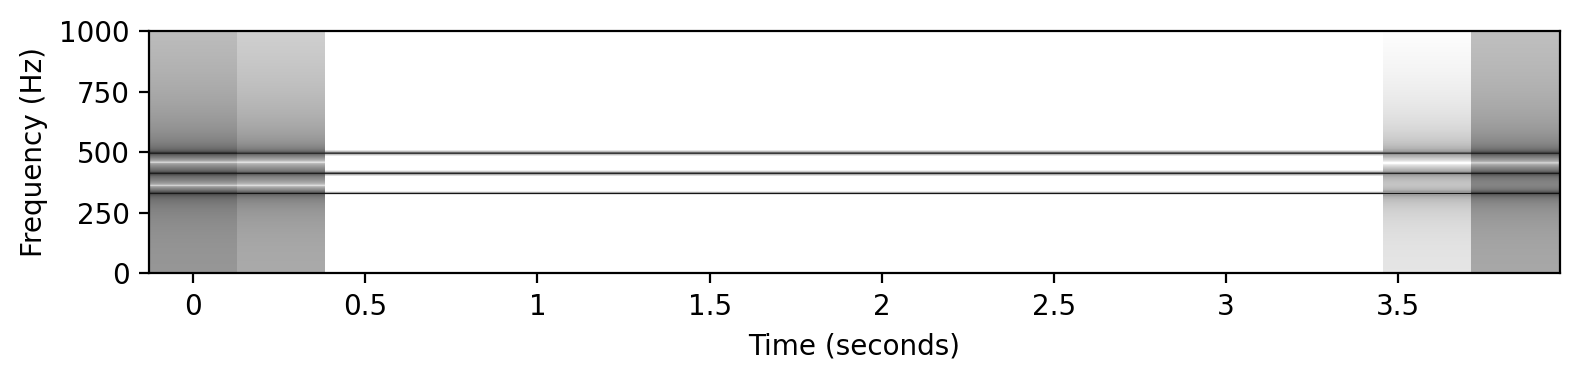

In [22]:
# ピタゴラス音律
x2 = sinusoid_freq_pyt[root]+sinusoid_freq_pyt[(root+7) % 12]*((root+4)//12+1)
x2 += +sinusoid_freq_pyt[(root+4) % 12]*((root+4)//12+1)
ipd.display(ipd.Audio(x2, rate=Fs))
libfmp.b.plot_signal(x2, Fs=Fs, figsize=(8, 2))
plt.show()
plot_spectrogram(x2, Fs=Fs, N=4096, H=1024, figsize=(8, 2))

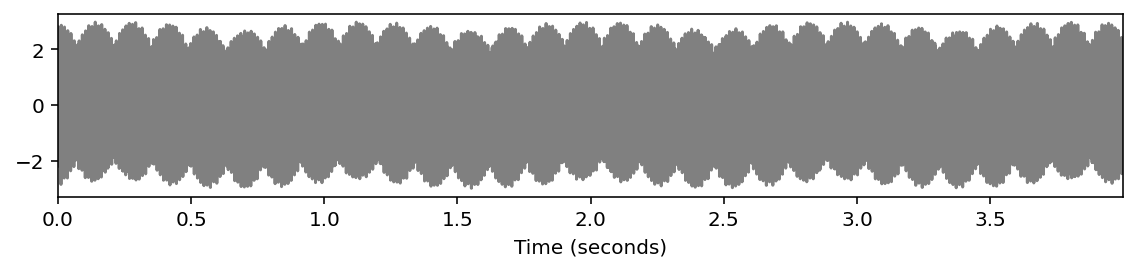

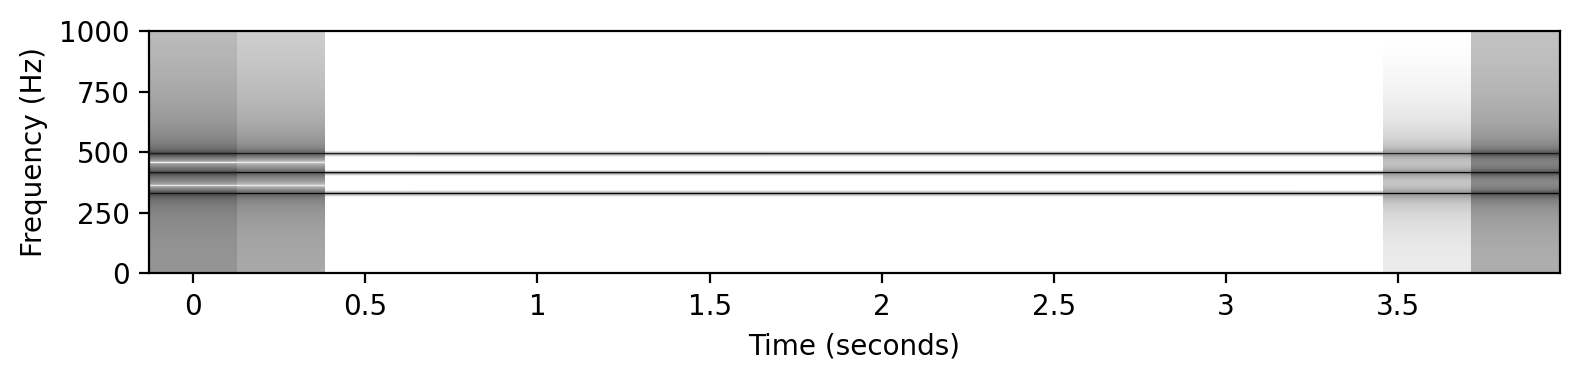

In [23]:
# 平均律
x3 = sinusoid_freq_center[root]+sinusoid_freq_center[(root+7) % 12]*((root+4)//12+1)
x3 += +sinusoid_freq_center[(root+4) % 12]*((root+4)//12+1)
ipd.display(ipd.Audio(x3, rate=Fs))
libfmp.b.plot_signal(x3, Fs=Fs, figsize=(8, 2))
plt.show()
plot_spectrogram(x3, Fs=Fs, N=4096, H=1024, figsize=(8, 2))

## 改めて課題

完全五度と長三和音で根音の設定を変えてピタゴラス音律と平均律の波形を比較し、ルネッサンス以降に平均律と三和音が使われるようになった理由を考えてみる

In [1]:
%%ai vioras
ルネッサンス前後に、ピタゴラス音律から平均律に移行した理由を教えてください

**ピタゴラス音律**とは、純粋な五度音程を基に作られた音律で、美しい倍音関係による和音を生み出します。しかし、その一方で、全てのキーで均等に美しい和音を得ることが難しいという欠点がありました。これは特に転調が多用されるようになった音楽にとって大きな問題でした。

それに対して、**平均律**は全ての半音が均等な比率を持つように調律された音律です。このため、どのキーでも均等に美しい和音を得ることが可能となり、複雑な転調が可能になりました。

ルネッサンス期以降の音楽は、複雑な転調や和声法が発展するにつれて、ピタゴラス音律の制約が問題となりました。このため、平均律が導入され、全てのキーで均一な和音関係を得ることが可能となりました。これにより、より複雑な音楽表現が可能となり、バロック音楽や古典派音楽などの発展を支えました。

ただし、平均律は全ての音程を完全に均等にするため、一部の和音（特に三和音）は純粋な倍音関係からわずかにずれます。したがって、ピタゴラス音律に比べて和音の響きは少し劣るとも言えます。しかし、その差は微小であり、より複雑な音楽表現が可能となる利点がそれを上回ると考えられています。

In [2]:
%%ai vioras
ピタゴラス音律での三和音は、唸りを生じる場合があります

はい、あなたのおっしゃる通りです。ピタゴラス音律では、三和音（特に長三和音や短三和音）が"唸り"を生じることがあります。これは「コンマ」と呼ばれる微細な音程のずれによるものです。

具体的には、ピタゴラス音律では完全五度を12回重ねて12音全てを生成しますが、その結果として得られる最後の音（すなわち、最初の音の倍音）と実際の2倍の音の間に微妙な音程のずれが生じます。このずれが「ピタゴラスのコンマ」と呼ばれています。

このコンマにより、特に三和音を形成するときに、理論的には純粋な倍音関係にあるはずの音が微妙にずれ、結果として理想的な和音から唸り音が生じます。

これに対して、平均律はこのコンマを各半音に分散させることで、どのキーでも同じ和音関係を維持します。これにより、どのキーでも同じように和音が鳴り、唸りを生じることなく転調が可能になります。

したがって、ピタゴラス音律から平均律への移行は、音楽表現の幅を広げるための重要なステップでした。

In [3]:
%%ai vioras
三和音において、コンマのズレのないピタゴラス音律と平均律に大きな差はありません

あなたがおっしゃっている通り、ピタゴラス音律と平均律における三和音の違いは微細で、平均的な聴覚ではほとんど区別できません。実際、純粋な三和音（つまり、その音程が完全な整数比であるもの）を生み出す能力において、ピタゴラス音律は平均律よりも優れています。 

しかし、問題となるのは転調やコード進行です。ピタゴラス音律は特定のキーに特化していますので、転調すると音程のバランスが崩れてしまいます。これに対して、平均律は全ての半音が同じ間隔で配置されているため、どのキーでも同じ和音と音程関係を維持することができます。これにより、音楽家は自由な転調やコード進行を行うことができ、音楽表現の幅が大いに広がりました。

したがって、ピタゴラス音律から平均律への移行は、単に和音の美しさだけでなく、音楽表現全体の自由度を高めるための重要なステップだったと言えるでしょう。